<a href="https://colab.research.google.com/github/puja123-std/AI_LABSHEET_PUJA_PURBEY_021-361/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[5.3 5.6]
 [2.  2.1]]
converged after 2 itterations
Within-Cluster Sum of Squares (WCSS): 1.4467
Final centroids:
 [[5.25       5.55      ]
 [1.48333333 1.71666667]]
Cluster assignments: [1 1 1 1 0 0 0 0 1 1 0 0]


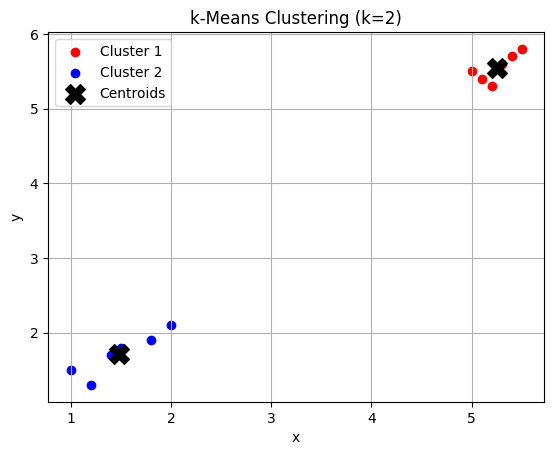

In [2]:
import numpy as np

import matplotlib.pyplot as plt


data = np.array([
    [1.0, 1.5],
    [1.5, 1.8],
    [1.2, 1.3],
    [1.4, 1.7],
    [5.0, 5.5],
    [5.5, 5.8],
    [5.2, 5.3],
    [5.4, 5.7],
    [2.0, 2.1],
    [1.8, 1.9],
    [5.1, 5.4],
    [5.3, 5.6]
])

k=2
#np.random.seed(42)
initial_centroid = np.random.choice(len(data),k,replace=False)
centroid =data[initial_centroid]
print(centroid)

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)
def assign_clusters(data,centroid):
  clusters=[]
  for point in data:
    distances= [euclidean_distance(point,centroi) for centroi in centroid]
    cluster_index = np.argmin(distances)
    clusters.append(cluster_index)
  return np.array(clusters)

def update_centroids(data,clusters,k):
  new_centroids=[]
  for i in range(k):
    points_in_cluster =  data[clusters==i]
    if (len(points_in_cluster)>0):
      new_centroid = points_in_cluster.mean(axis=0)
    else:
      new_centroid = data[np.random.choice(len(data))]
    new_centroids.append(new_centroid)
  return np.array(new_centroids)

max=100;
for iterations in range(max):
  clusters=assign_clusters(data,centroid)
  new_centroids= update_centroids(data,clusters,k)
  if np.allclose(centroid,new_centroids):
    print(f"converged after {iterations+1} itterations")
    break
  centroid = new_centroids
def compute_wcss(data, clusters, centroid):
    wcss = 0
    for i in range(k):
        points = data[clusters == i]
        wcss += np.sum((points - centroid[i])**2)
    return wcss
wcss = compute_wcss(data, clusters, centroid)

print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.4f}")
print("Final centroids:\n", centroid)
print("Cluster assignments:", clusters)
colors = ['r', 'b']
for i in range(k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroid[:, 0], centroid[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.title('k-Means Clustering (k=2)')
plt.legend()
plt.grid(True)
plt.show()

Initial centroids:
 [[1.  1.5 0.8 1.2]
 [1.2 1.7 0.9 1.1]
 [2.1 2.3 1.9 2. ]]
Converged after 4 iterations
Final centroids:
 [[1.15       1.55       0.8125     1.1875    ]
 [2.05       2.25       1.85       2.05      ]
 [4.25       4.65       3.86666667 4.25      ]]
Cluster assignments: [0 0 0 0 2 2 2 2 1 1 2 2]
Within-Cluster Sum of Squares (WCSS): 0.6421


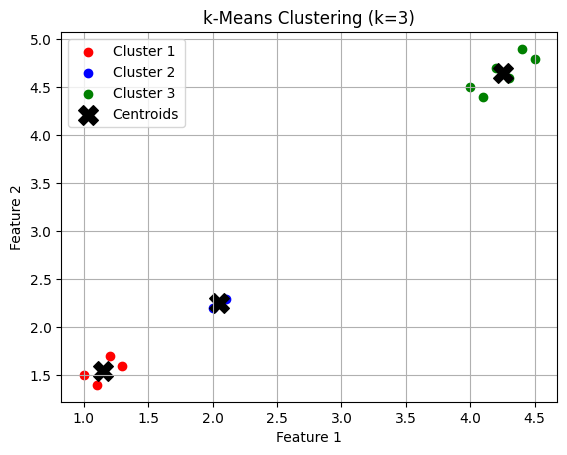

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [1.0, 1.5, 0.8, 1.2],
    [1.2, 1.7, 0.9, 1.1],
    [1.1, 1.4, 0.7, 1.3],
    [1.3, 1.6, 0.85, 1.15],
    [4.0, 4.5, 3.8, 4.2],
    [4.2, 4.7, 3.9, 4.1],
    [4.1, 4.4, 3.7, 4.3],
    [4.3, 4.6, 3.85, 4.15],
    [2.0, 2.2, 1.8, 2.1],
    [2.1, 2.3, 1.9, 2.0],
    [4.5, 4.8, 4.0, 4.4],
    [4.4, 4.9, 3.95, 4.35]
])


k=3
initial_indices = np.random.choice(len(data), k, replace=False)
centroids = data[initial_indices]
print("Initial centroids:\n", centroids)
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        # Calculate distance to each centroid
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

def update_centroids(data, clusters, centroids, k):
    new_centroids = []
    for i in range(k):
        # Get points assigned to cluster i
        points_in_cluster = data[clusters == i]

        if len(points_in_cluster) > 0:
            # Calculate mean of points in cluster (axis=0 for column-wise mean)
            new_centroid = np.mean(points_in_cluster, axis=0)
        else:
            # Keep previous centroid if cluster is empty
            new_centroid = centroids[i]
        new_centroids.append(new_centroid)
    return np.array(new_centroids)
max_iters = 100
for i in range(max_iters):
    clusters = assign_clusters(data, centroids)
    new_centroids = update_centroids(data, clusters, centroids, k)

    # Check for convergence (centroids haven't moved)
    if np.allclose(centroids, new_centroids, atol=1e-4):
        print(f"Converged after {i+1} iterations")
        break

    centroids = new_centroids
else:
    print(f"Reached maximum iterations ({max_iters})")
print("Final centroids:\n", centroids)
print("Cluster assignments:", clusters)


def compute_wcss(data, clusters, centroids):
    wcss = 0
    for i in range(k):
        points = data[clusters == i]
        wcss += np.sum((points - centroids[i])**2)
    return wcss
wcss = compute_wcss(data, clusters, centroids)
print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.4f}")

# Step 5: Visualization (using first two features)
colors = ['r', 'b', 'g', 'c', 'm', 'y']
for i in range(k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[i % len(colors)], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-Means Clustering (k={k})')
plt.legend()
plt.grid(True)
plt.show()